In [104]:
import numpy as np 
from matplotlib import pyplot as plt

The Velocity Verlet algorithm utilzes Taylor Series to estimate how functions that are usually dependent on time change over time. This is done by taking a change in time, $\Delta$t, and calculating the function at initial time plus that change in time using a Taylor series that involves its derivatives. 

You can solve a differential equation this way. In this case, we start with a function 

$\ddot{\phi} = -g/R*sin(\phi)$

and want to solve it so that we can see how its motion changes over time (the function of $\phi$). 

With our situation of a skateboard, if we start with initial conditions t = 0, $\phi$(0) = $\phi$ (some angle), and $\dot{\phi}$(0) = 0 (because the skateboard hasn't started moving yet if we assume that) and the steps of time are enumerated by $\Delta$t = $\Delta$t, then calculating the next step in our motion looks like this: 

$\phi(\Delta t) = \phi(0) + \Delta t *\dot{\phi}(0) + \frac{\Delta t^2}{2}* \ddot{\phi}(0)$

But for the next step, it will look like this,: 

$\phi(2\Delta t) = \phi(\Delta t) + \Delta t *\dot{\phi}(\Delta t) + \frac{\Delta t^2}{2}* \ddot{\phi}(\Delta t)$

And we can quickly see that, though we have $\phi(\Delta t)$ from the last step, and we can use this to also calculate $\ddot{\phi}(\Delta t)$, we need $\dot{\phi}(\Delta t)$. So we use the same algorithm 

$\dot{\phi}(\Delta t) = \dot{\phi}(0) + \Delta t *\ddot{\phi}(0) + \frac{\Delta t^2}{2}* \dddot{\phi}(0)$

And the only unknown now is $\dddot{\phi}$. We can use one more Taylor series to figure this out: 

$\ddot{\phi}(\Delta t) = \ddot{\phi}(0) + \Delta t *\dddot{\phi}(0)$

We can rearrange so that we have 

$\Delta t *\dddot{\phi}(0) = \ddot{\phi}(\Delta t) - \ddot{\phi}(0)$

which, since $\ddot{\phi}$ is a function of $\phi$, means that we need $\phi(\Delta t)$ and $\phi(0)$, which after the first step, we have both! So now we can plug this into our second equation that updates $\dot{\phi}$: 

$\dot{\phi}(\Delta t) = \dot{\phi}(0) + \Delta t *\ddot{\phi}(0) + \frac{\Delta t}{2}*(\ddot{\phi}(\Delta t) - \ddot{\phi}(0))$

So now we are able to move from step to step without any unknowns when we are trying to update $\phi$. This process continues by just adding the change in time over and over in a loop, with the desired length of analysis, time intervals, and inital coniditions. I write code that does this process over a loop below. 

In [105]:
#Here I am defining my velocity verlet algorithm 
#So that I can implement it with any initial coniditions and delta t that I want 

def Velocity_Verlet(t_0, phi_0, phi_dot_0, deltat, tf):

    #Defining inital conditions from function inputs 
    t = t_0 
    dt = deltat 
    phi = phi_0
    phi_dot = phi_dot_0
    tfinal = tf
    
    #This is the equation we know, including the sin portion 
    #Because we are not using the small angle approximation 
    def phi_dotdot(phi): 
        return -9.8/5*np.sin(phi)

    #These will be where the data of each 'step' is stored 
    #As they are calculated 
    times = []
    phis = []
    phi_dots = [] 

    #The loop goes for as long as we want to analyze the function 
    while t < tfinal:
        
        #first we take the taylor series for phi to get the next value of phi after t + dt  
        phi_update = phi + dt*phi_dot + (dt**2/2)*(phi_dotdot(phi))
        
        #then we update phi dot with it's respective taylor series and the now updated phi 
        #where it is needed in the last term 
        #the last term was derived as shown above 
        phi_dot_update = phi_dot + dt*(phi_dotdot(phi)) + (dt/2)*(phi_dotdot(phi_update) - phi_dotdot(phi))
        
        #for the next step, we need to define the 'initial conditions' as whatever the last step was 
        #so we are updating the values of phi and phi dot here for  the sake of calculating the next step 
        phi = phi_update 
        phis.append(phi)
        phi_dot = phi_dot_update 
        phi_dots.append(phi_dot)
        
        times.append(t)
        
        #we add dt to move on to next step 
        t+=dt 
        
    return times,phis,phi_dots

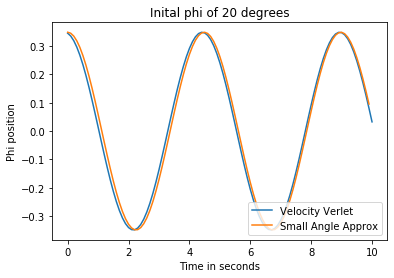

In [106]:
#Here we can define the angle we want to analyze
angle = 20*np.pi/180

#This is the non-approximate velocity verlet method 
times, phis, phi_dots = Velocity_Verlet(0, angle, 0, 0.1,10)
plt.plot(times,phis,label='Velocity Verlet')

#This is using the formula from the small angle approximtation
#which is reached if you take phi dot dot to be -g/R theta, as opposed to -g/R sin theta 
x = np.arange(0,10,0.1) #analyzing it for same range 
y = (angle)*np.cos((np.sqrt(9.8/5))*x)
plt.plot(x,y,label='Small Angle Approx')

plt.xlabel('Time in seconds')
plt.ylabel('Phi position')
plt.title('Inital phi of 20 degrees')
plt.legend(loc='lower right')

As is expected, for an angle that is 20 degrees, a small angle approximation is generally good. The methods align fairly well, though they diverge more at the outset than they do as time goes on. The motion emulates an oscillator's motion or a cosine curve because in these calculations friction forces have been ignored, so the skateboard's movement is not 'damped'. 

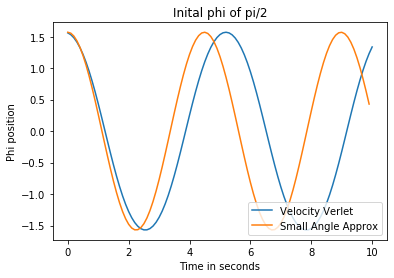

In [107]:
#same process as above just with different angle 
angle = np.pi/2

times, phis, phi_dots = Velocity_Verlet(0, angle, 0, 0.1,10)
plt.plot(times,phis,label='Velocity Verlet')

x = np.arange(0,10,0.1) 
y = (angle)*np.cos((np.sqrt(9.8/5))*x)
plt.plot(x,y,label='Small Angle Approx')

plt.xlabel('Time in seconds')
plt.ylabel('Phi position')
plt.title('Inital phi of pi/2')
plt.legend(loc='lower right')

This demonstrates that the small angle approximation does not always hold up. Initially it is a decent approximator for a short time, but the longer time goes on it becomes more inaccurate in that it assumes a higher 'velocity' of the skateboard. So this could prove somewhat usable if you were looking at a very short timescale, but realistically it's not nearly as good of an approximation anymore with the angle being larger. 
